<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Laboratorios/Laboratorio%203/Sesión%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

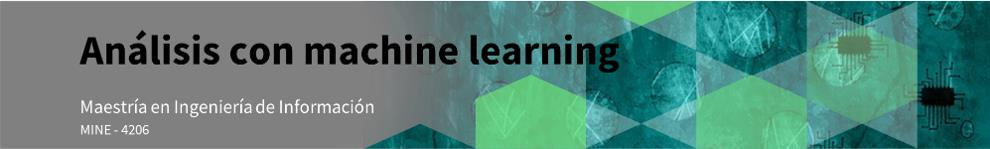

**Tutores**.
* Nicolás Tibatá Casteñeda.
* Fabián Camilo Castellanos P.

#Tabla de contenido

[Contexto y objetivos.](scrollTo=opGTmPf8s2Fw)<br>
[Entendimiento del negocio.](#scrollTo=-kiLjQjCcsTe)<br>
[0. Instalación de librerías.](#scrollTo=oIZKc1y3dD8w)<br>
[1. Importar librerías](#scrollTo=cG7PoLJhdKjr)<br>
[2. Introducción a los datos.](#scrollTo=znM2yr8FdRFr)<br>
[3. Modelamiento.](#scrollTo=XeqByH6ZdewG)<br>
[4. Preguntas.](#scrollTo=oxBzH4VYdlUU)<br>

---
# Contexto y objetivos.

En la actualidad, la cantidad de artículos publicados en Internet está generando una gran ola de información accesible por cualquier usuario, dando a conocer diferentes puntos de vista, opiniones, información e investigaciones sobre diferentes temas de interés.

Esta gran cantidad de información no solo permite una búsqueda exhaustiva sobre un tema, también permite realizar un análisis sobre la tendencia de los diferentes temas que estén dando de qué hablar en una sociedad. Es por ello que un grupo de expertos se ha dado la tarea de analizar 10.000 artículos web y clasificarlos para poder establecer un análisis de los temas en la actualidad.

Para ello, como experto en análisis con machine learning, le han pedido que construya un modelo capaz de clasificar los nuevos artículos, realice un análisis de cuáles son los temas que dan de que hablar y automatice el proceso de selección y búsqueda de diferentes artículos.

**Objetivos:**

* Realizar el análisis y limpieza de textos.
* Explorar las diferentes técnicas de transformación de datos no estructurados.
* Establecer el mejor modelo basado en una red neuronal.

La fuente de los datos la puedes encontrar en [News Articles Classification Dataset for NLP & ML](https://www.kaggle.com/datasets/banuprakashv/news-articles-classification-dataset-for-nlp-and-ml).



# Entendimiento del negocio.

Para tener un mejor detalle sobre el comportamiento de las variables, solicitamos a la organización el diccionario de datos y nos suministró la siguiente información:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **headlines** | Titular del artículo.|
| **description** | Reseña del artículo.|
| **content** | Contenido del artículo.|
| **url** | Dirección web del artículo.|
| **category** | Representa la temática del artículo.|

## Verificar estado de GPU

Para estar seguros de los recursos de procesamiento, ejecutamos la siguiente función:

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Apr  5 03:18:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

---
# 0. Instalación de librerías.

In [2]:
#Librería para la exploración profunda de información
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=690eae4638022083860fd651511b0c84952cf4978e9381615ab310f2e9bbc27d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [3]:
#Librería para descarga de la información
!pip install kaggle

In [4]:
#Librería para redes naturales
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.7 MB/s eta 0:00:00


In [5]:
#Librería para lenguaje natural
!pip install spacy

In [6]:
#Librerías para identificación de idiomas
!pip install polyglot
!pip install PyICU
!pip install pycld2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52561 sha256=7598d0ae4cb884f5b3e7a08a202371a46916d41ec757e8d3ff1eb7a661c69425
  Stored in directory: /root/.cache/pip/wheels/aa/92/4a/b172589446ba537db3bdb9a1f2204f27fe71217981c14ac368
Successfully built polyglot
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.0/260.0 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyICU: filename=PyICU-2.12-cp310-cp310-linux_x86_64.whl size=1754546 sha256=b668fba4794748ae3db385396b7da36d99809ace5e1d24fadd0841bf5c83693b
  Stored in directory: /root/.cache/pip/wheels/74/60/95/66d97ac2fdc8be8e526c4254047405fe77feaf064282d1ad07
Successfully built PyICU
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 28.7 MB/s eta 

In [7]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.7 MB/s eta 0:00:00


---
# 1. Importar librerías

In [8]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay

#Textos
import contractions
import inflect
import nltk
import re, string, unicodedata
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from polyglot.detect import Detector
from wordcloud import WordCloud, STOPWORDS

#Tensorflow y keras
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

#Sistema operativo
import os
import os.path as osp

#Librerías extras
import itertools
from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")
print(f'La versión de Tensor Flow es:', tf.__version__)

La versión de sklearn es: 1.2.2
La versión de Tensor Flow es: 2.15.0


Descarga de información de nltk

In [9]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

---
# 2. Introducción a los datos.

##2.1. Parámetros generales y carga de la información.

In [10]:
#Porcentaje para validación y test
test_alpha = 0.2
#random_state o semilla para la reproducibilidad
my_seed = 19

## 2.2. Configuración del entorno de kaggle.

Preparar el archivo de kaggle para la descarga

In [11]:
!ls -lha kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 69 Apr  5 03:18 kaggle.json


Verificamos la conectividad con kaggle, usando un comando para ver una previsualización de datasets:

In [12]:
!kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          18836        376  0.9411765        
sahirmaharajj/electric-vehicle-population-size-2024         Electric Vehicle Population by Country (2024)  275KB  2024-03-30 19:16:06            970         29  1.0              
mexwell/drug-consumption-classification                     💊 Drug Consumption Classification               56KB  2024-03-28 15:02:22           1507         33  1.0              
jatinthakur706/most-watched-netflix-original-shows-tv-time  Most watched Netflix original shows (TV Time)

Una vez hemos asegurado la conectividad, procedemos a realizar el proceso de descarga de la información del negocio.

In [13]:
!kaggle datasets download banuprakashv/news-articles-classification-dataset-for-nlp-and-ml

  0% 0.00/5.57M [00:00<?, ?B/s]
100% 5.57M/5.57M [00:00<00:00, 81.7MB/s]


La información descargada en formato zip, cuenta con un archivo csv en su interior, si vieramos de forma gráfica su estructura, sería la siguiente:

```python
news-articles-classification-dataset-for-nlp-and-ml.zip/
  business_data.csv
  education_data.csv
  entertainment_data.csv
  sports_data.csv
  technology_data.csv
```

Teniendo en cuenta lo anterior, vamos a descomprimir la información, es necesario crear un un directorio para que el contenido del archivo zip, se encuentre allí. Para este propósito, vamos a crear unas variables de manejo de archivos:

In [14]:
ROOT_DIR = '/content'
DATASET_NAME = 'news-articles-classification-dataset-for-nlp-and-ml'

Vamos ahora a generar una previsualización del comando de descompresión del archivo zip:

In [15]:
print(f"!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}")

!unzip news-articles-classification-dataset-for-nlp-and-ml.zip -d /content/news-articles-classification-dataset-for-nlp-and-ml


Ahora si vamos a consolidar el bloque de comandos con todos los pasos para la descompresión del archivo zip:

In [16]:
%cd {ROOT_DIR}
!mkdir /{DATASET_NAME}
!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

/content
Archive:  news-articles-classification-dataset-for-nlp-and-ml.zip
  inflating: /content/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv  
  inflating: /content/news-articles-classification-dataset-for-nlp-and-ml/education_data.csv  
  inflating: /content/news-articles-classification-dataset-for-nlp-and-ml/entertainment_data.csv  
  inflating: /content/news-articles-classification-dataset-for-nlp-and-ml/sports_data.csv  
  inflating: /content/news-articles-classification-dataset-for-nlp-and-ml/technology_data.csv  


Generamos la ruta del directorio para cargar la información:

In [17]:
DATA_DIR = f"{ROOT_DIR}/{DATASET_NAME}"
print(DATA_DIR)

/content/news-articles-classification-dataset-for-nlp-and-ml


## 2.3. Separación de la información.

Listamos los archivos al interior de la carpeta:

In [18]:
csv_files = os.listdir(DATA_DIR)

train_df = pd.DataFrame()
test_df = pd.DataFrame()

for csv_file in csv_files:
  new_df = pd.read_csv(osp.join(DATA_DIR, csv_file))
  train, test = train_test_split(new_df, test_size=test_alpha, random_state=my_seed)
  train_df = pd.concat([train_df, train])
  test_df = pd.concat([test_df, test])

train_df.head()

,headlines,description,content,url,category
636,Rajinikanth fan mocks Vijay starrer The Greate...,A Rajinikanth fan shared a poster of Will Smit...,Director Venkat Prabhu has never shied away fr...,https://indianexpress.com/article/entertainmen...,entertainment
161,Agastya Nanda says he probably didn’t deserve ...,Agastya Nanda also revealed why he did not fee...,"Actor Agastya Nanda, who was recently seen in ...",https://indianexpress.com/article/entertainmen...,entertainment
855,Malaikottai Valiban new poster out: Mohanlal i...,Lijo Jose Pellissery and Mohanlal have been ti...,If Kalki AD 2989 is the next big thing in the ...,https://indianexpress.com/article/entertainmen...,entertainment
24,Hanu Man actor Teja Sajja on the responsibilit...,Teja Sajja and Prasanth Varma's Hanu Man has p...,"Actor Teja Sajja’s mythological film Hanu Man,...",https://indianexpress.com/article/entertainmen...,entertainment
252,Arun Matheswaran: ‘Captain Miller is my least ...,Arun Matheswaran calls Dhanush one of the shar...,Speaking at the audio launch of Captain Miller...,https://indianexpress.com/article/entertainmen...,entertainment


Demos un vistazo al número de instancias para cada uno de los conjuntos de datos:

In [19]:
train_count = train_df.shape[0]
test_count = test_df.shape[0]

print("-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------")
print(f"-> Train: {train_count:,}")
print(f"-> Test: {test_count:,}")

-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------
-> Train: 8,000
-> Test: 2,000


Ahora verificamos las categorías:

In [20]:
train_df["category"].value_counts()

category
entertainment    1600
education        1600
technology       1600
sports           1600
business         1600
Name: count, dtype: int64

In [21]:
test_df["category"].value_counts()

category
entertainment    400
education        400
technology       400
sports           400
business         400
Name: count, dtype: int64

Definimos las variables X e Y para el modelo

In [22]:
target_feature = 'category'

In [23]:
x_feature = 'content'

Generamos una copia para el proceso exploratorio de transformación de los datos:

In [24]:
X_train_trans = train_df.copy()
X_train_trans

,headlines,description,content,url,category
636,Rajinikanth fan mocks Vijay starrer The Greate...,A Rajinikanth fan shared a poster of Will Smit...,Director Venkat Prabhu has never shied away fr...,https://indianexpress.com/article/entertainmen...,entertainment
161,Agastya Nanda says he probably didn’t deserve ...,Agastya Nanda also revealed why he did not fee...,"Actor Agastya Nanda, who was recently seen in ...",https://indianexpress.com/article/entertainmen...,entertainment
855,Malaikottai Valiban new poster out: Mohanlal i...,Lijo Jose Pellissery and Mohanlal have been ti...,If Kalki AD 2989 is the next big thing in the ...,https://indianexpress.com/article/entertainmen...,entertainment
24,Hanu Man actor Teja Sajja on the responsibilit...,Teja Sajja and Prasanth Varma's Hanu Man has p...,"Actor Teja Sajja’s mythological film Hanu Man,...",https://indianexpress.com/article/entertainmen...,entertainment
252,Arun Matheswaran: ‘Captain Miller is my least ...,Arun Matheswaran calls Dhanush one of the shar...,Speaking at the audio launch of Captain Miller...,https://indianexpress.com/article/entertainmen...,entertainment
...,...,...,...,...,...
936,SEBI announces system to report demise of inve...,After receiving intimation about the demise of...,The Securities and Exchange Board of India (SE...,https://indianexpress.com/article/business/seb...,business
1378,Air India launches 4-day sale on flights acros...,Air India is offering fares starting from Rs 1...,Tata Group-owned Air India has launched a four...,https://indianexpress.com/article/business/avi...,business
757,"4% inflation target top priority, show minutes...","At this point of time, the guidance that the m...",The Monetary Policy Committee (MPC) will remai...,https://indianexpress.com/article/business/ban...,business
622,‘EPFO in process of crediting 8.15% interest f...,“...(Labour Minister) expressed satisfaction t...,Union Labour and Employment Minister Bhupender...,https://indianexpress.com/article/business/epf...,business


## 2.4. Exploración de los datos.

Vamos a generar un `WordCloud`, el cuál nos permitirá realizar un análisis de las palabras más recurrentes dentro de cada una de las categorias.

Iniciamos definiendo una función para este propósito:

In [25]:
def show_wordcloud(palabras,stopwords=[]):
    comment_words = ''

    # iterate through the csv file
    for val in palabras:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

Generamos el llamado para cada una de las clases:

---------- Words for class: entertainment ----------


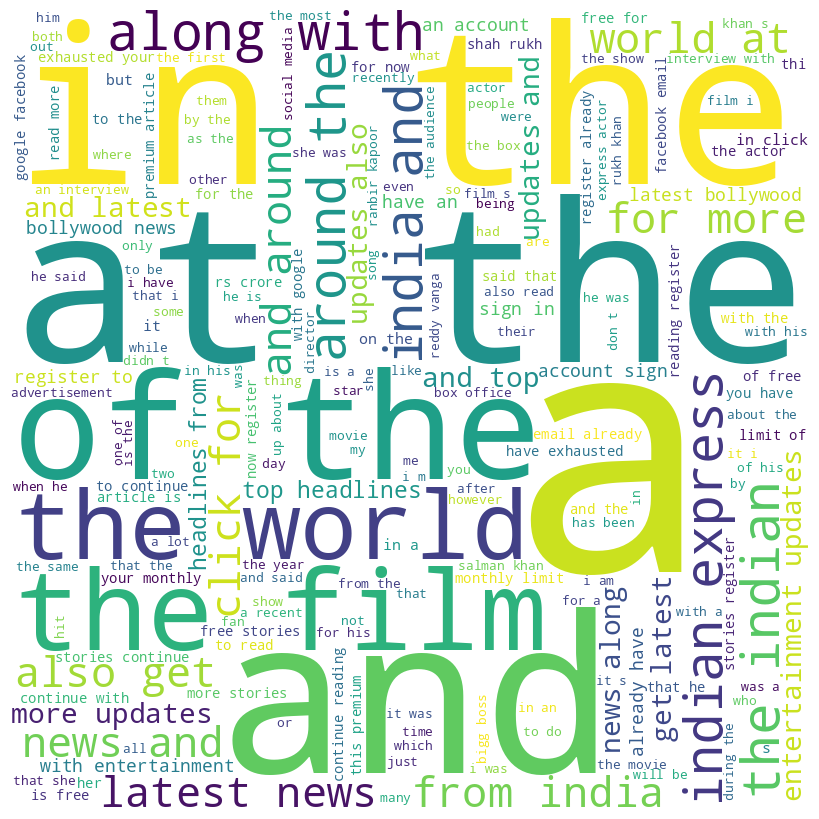

---------- Words for class: education ----------


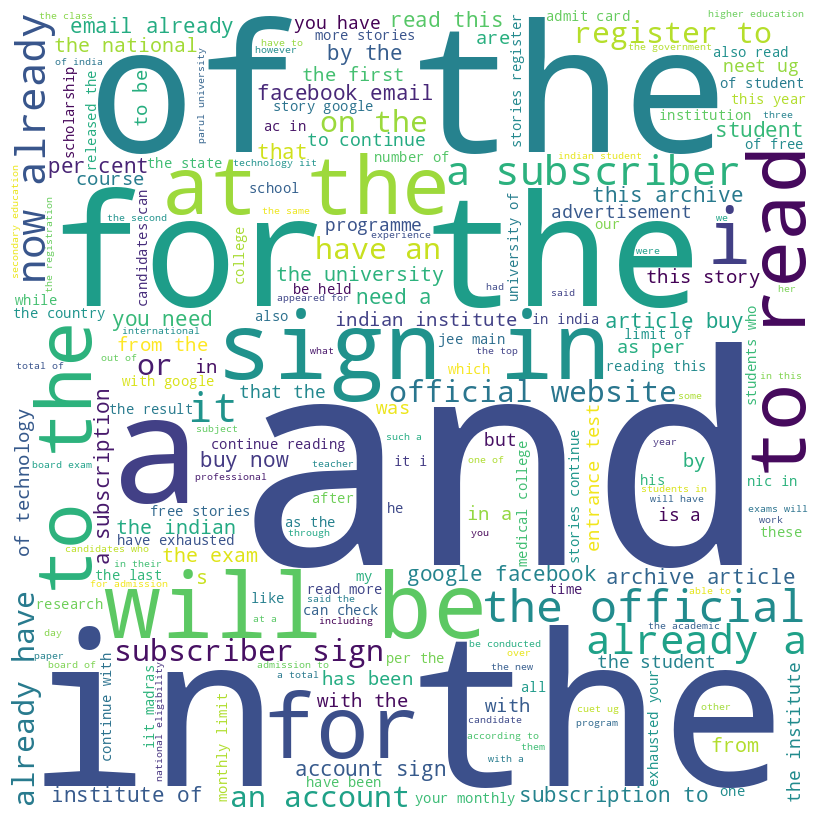

---------- Words for class: technology ----------


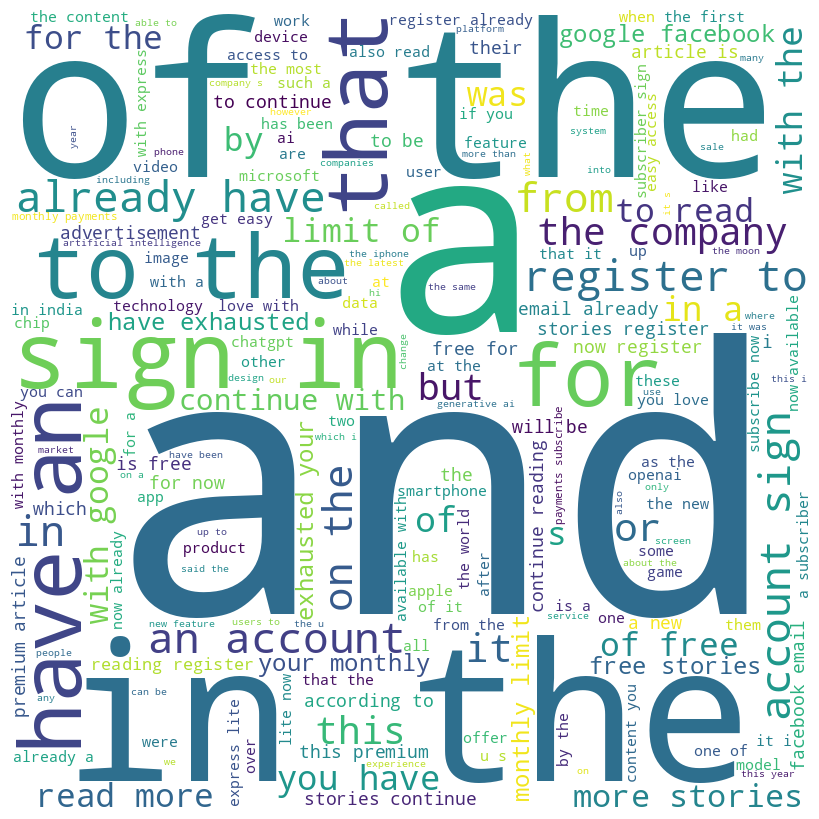

---------- Words for class: sports ----------


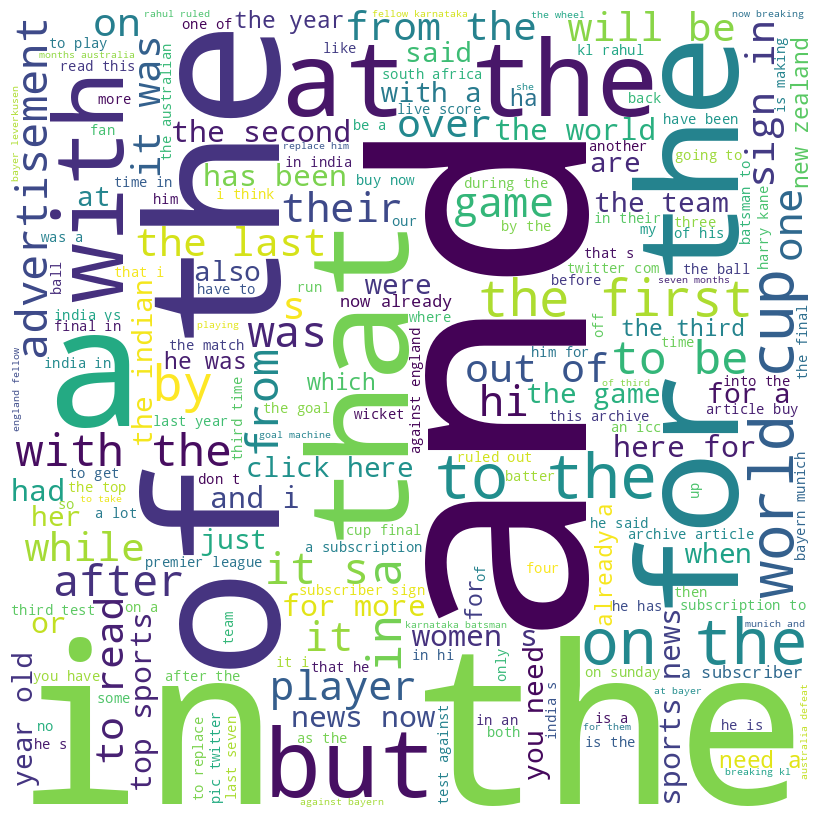

---------- Words for class: business ----------


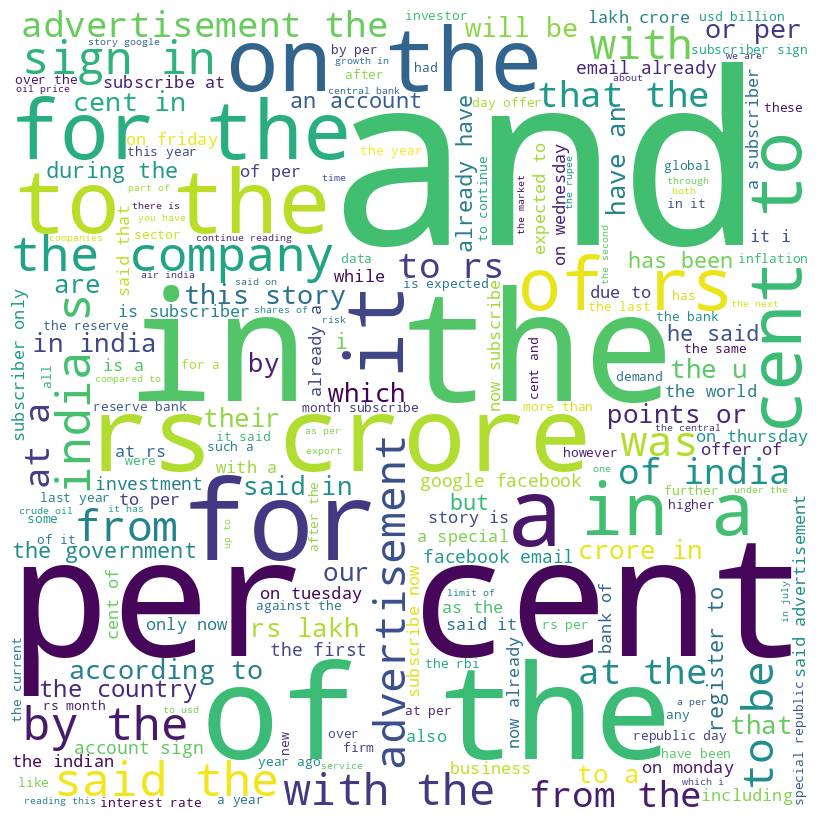

In [26]:
for i in train_df[target_feature].unique():
    print(f'---------- Words for class: {i} ----------')
    show_wordcloud(train_df.loc[train_df[target_feature]==i, x_feature])

Como vimos, hay varias palabras frecuentes que no aportan mucha información, esas palabras las llamamos `stopwords`. Existen librerias como `nltk` que han construido esta lista de palabras, llamaremos la función nuevamente para visualizar el wordcloud sin tener en cuenta los stopwords:

In [27]:
stop_words = stopwords.words('english')

In [28]:
for i in train_df[target_feature].unique():
    print(f'---------- Words for class: {i} ----------')
    show_wordcloud(train_df.loc[train_df[target_feature]==i, x_feature], stop_words)

Output hidden; open in https://colab.research.google.com to view.

El procesamiento de textos es sensible a los idiomas, por lo tanto vamos a verificar con ayuda de la librería `polyglot`:

In [29]:
def set_language(val):
  lang = Detector(str(val)).language.name.lower()
  return lang

train_df["language"] = train_df[x_feature].apply(set_language)
train_df["language"].unique()

array(['english'], dtype=object)

Vemos que los datos se encuentran en idioma inglés, por lo tanto no será necesario eliminar información por esta razón.

## 2.5. Preparación de la información.

### 2.5.1. Codificación de temáticas.

In [30]:
label_encoder = LabelEncoder()
train_df[target_feature] = label_encoder.fit_transform(train_df[target_feature])
test_df[target_feature] = label_encoder.fit_transform(test_df[target_feature])

unique_labels = label_encoder.classes_
for num_value, original_label in enumerate(unique_labels):
    print(f'Valor numérico: {num_value}, Etiqueta original: {original_label}')

Valor numérico: 0, Etiqueta original: business
Valor numérico: 1, Etiqueta original: education
Valor numérico: 2, Etiqueta original: entertainment
Valor numérico: 3, Etiqueta original: sports
Valor numérico: 4, Etiqueta original: technology


Obtenemos los valores en X e Y para cada uno de los casos:

In [31]:
X_train, Y_train = train_df[x_feature], train_df[target_feature]
display(X_train)
Y_train

636     Director Venkat Prabhu has never shied away fr...
161     Actor Agastya Nanda, who was recently seen in ...
855     If Kalki AD 2989 is the next big thing in the ...
24      Actor Teja Sajja’s mythological film Hanu Man,...
252     Speaking at the audio launch of Captain Miller...
                              ...                        
936     The Securities and Exchange Board of India (SE...
1378    Tata Group-owned Air India has launched a four...
757     The Monetary Policy Committee (MPC) will remai...
622     Union Labour and Employment Minister Bhupender...
1629    The Union government has approved a scheme pro...
Name: content, Length: 8000, dtype: object

636     2
161     2
855     2
24      2
252     2
       ..
936     0
1378    0
757     0
622     0
1629    0
Name: category, Length: 8000, dtype: int64

In [32]:
X_test, Y_test = test_df[x_feature], test_df[target_feature]
display(X_test)
Y_test

321     The Internet Movie Database (IMDb) has unveile...
1775    TV actors Divyanka Tripathi and Vivek Dahiya m...
953     Director Jude Anthany Joseph took to social me...
529     Deepika Padukone has always said that she and ...
1878    Actor Mansoor Ali Khan’s offensive and misogyn...
                              ...                        
1006    India will set carbon emission reduction targe...
1272    The average time taken for resolution or liqui...
1497    Indian wheat prices surged to a six-month high...
1756    Gautam Adani, Chairman of Adani Group on Tuesd...
921     In the run-up to Assembly polls in five states...
Name: content, Length: 2000, dtype: object

321     2
1775    2
953     2
529     2
1878    2
       ..
1006    0
1272    0
1497    0
1756    0
921     0
Name: category, Length: 2000, dtype: int64

Para poder realizar el pre-procesamiento de los datos, es recomendable pasar por tres etapas:
* Eliminación del Ruido.
* Tokenización.
* Normalización.

Para mayor información, pueden consultar el [siguiente artículo](https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767
).

### 2.5.2. Eliminación de ruido.

La eliminación del ruido se utiliza para dejar el archivo en texto plano, sobre todo cuando vienen de diferentes fuentes como HTML, Twitter, XML, entre otros. También para eliminar caracteres especiales y pasar todo a minúscula.

In [33]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words, stopwords=stopwords.words('english')):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def preproccesing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

---------------

### 2.5.3. Tokenización.

In [34]:
X_train_new = X_train.apply(word_tokenize)
X_train_new = X_train_new.apply(preproccesing) #Aplica la eliminación del ruido
X_train_new.head()

636    [director, venkat, prabhu, never, shied, away,...
161    [actor, agastya, nanda, recently, seen, zoya, ...
855    [kalki, ad, two thousand nine hundred and eigh...
24     [actor, teja, sajja, mythological, film, hanu,...
252    [speaking, audio, launch, captain, miller, dha...
Name: content, dtype: object

Al realizarlo fila a fila se vería de la siguiente forma:

In [35]:
X_train_trans['trans'] = X_train_trans['content'].apply(nltk.word_tokenize)

In [36]:
X_train_trans['trans'] = X_train_trans['trans'].apply(preproccesing)
X_train_trans

,headlines,description,content,url,category,trans
636,Rajinikanth fan mocks Vijay starrer The Greate...,A Rajinikanth fan shared a poster of Will Smit...,Director Venkat Prabhu has never shied away fr...,https://indianexpress.com/article/entertainmen...,entertainment,"[director, venkat, prabhu, never, shied, away,..."
161,Agastya Nanda says he probably didn’t deserve ...,Agastya Nanda also revealed why he did not fee...,"Actor Agastya Nanda, who was recently seen in ...",https://indianexpress.com/article/entertainmen...,entertainment,"[actor, agastya, nanda, recently, seen, zoya, ..."
855,Malaikottai Valiban new poster out: Mohanlal i...,Lijo Jose Pellissery and Mohanlal have been ti...,If Kalki AD 2989 is the next big thing in the ...,https://indianexpress.com/article/entertainmen...,entertainment,"[kalki, ad, two thousand nine hundred and eigh..."
24,Hanu Man actor Teja Sajja on the responsibilit...,Teja Sajja and Prasanth Varma's Hanu Man has p...,"Actor Teja Sajja’s mythological film Hanu Man,...",https://indianexpress.com/article/entertainmen...,entertainment,"[actor, teja, sajja, mythological, film, hanu,..."
252,Arun Matheswaran: ‘Captain Miller is my least ...,Arun Matheswaran calls Dhanush one of the shar...,Speaking at the audio launch of Captain Miller...,https://indianexpress.com/article/entertainmen...,entertainment,"[speaking, audio, launch, captain, miller, dha..."
...,...,...,...,...,...,...
936,SEBI announces system to report demise of inve...,After receiving intimation about the demise of...,The Securities and Exchange Board of India (SE...,https://indianexpress.com/article/business/seb...,business,"[securities, exchange, board, india, sebi, tue..."
1378,Air India launches 4-day sale on flights acros...,Air India is offering fares starting from Rs 1...,Tata Group-owned Air India has launched a four...,https://indianexpress.com/article/business/avi...,business,"[tata, groupowned, air, india, launched, fourd..."
757,"4% inflation target top priority, show minutes...","At this point of time, the guidance that the m...",The Monetary Policy Committee (MPC) will remai...,https://indianexpress.com/article/business/ban...,business,"[monetary, policy, committee, mpc, remain, foc..."
622,‘EPFO in process of crediting 8.15% interest f...,“...(Labour Minister) expressed satisfaction t...,Union Labour and Employment Minister Bhupender...,https://indianexpress.com/article/business/epf...,business,"[union, labour, employment, minister, bhupende..."


### 2.5.4. Normalización.

Para la normalización de los datos se realiza una eliminación de prefijos y sufijos, además de realizar una lemmatización de los verbos.

In [37]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer('english')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    words = stem_words(words)
    words = lemmatize_verbs(words)
    return words

In [38]:
X_train_new = X_train_new.apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
X_train_new.head()

636    [director, venkat, prabhu, never, shi, away, a...
161    [actor, agastya, nanda, recent, see, zoya, akh...
855    [kalki, ad, two thousand nine hundred and eigh...
24     [actor, teja, sajja, mytholog, film, hanu, man...
252    [speak, audio, launch, captain, miller, dhanus...
Name: content, dtype: object

Al verlo fila a fila:

In [39]:
X_train_trans['trans'] = X_train_trans['trans'].apply(stem_words)
X_train_trans

,headlines,description,content,url,category,trans
636,Rajinikanth fan mocks Vijay starrer The Greate...,A Rajinikanth fan shared a poster of Will Smit...,Director Venkat Prabhu has never shied away fr...,https://indianexpress.com/article/entertainmen...,entertainment,"[director, venkat, prabhu, never, shi, away, a..."
161,Agastya Nanda says he probably didn’t deserve ...,Agastya Nanda also revealed why he did not fee...,"Actor Agastya Nanda, who was recently seen in ...",https://indianexpress.com/article/entertainmen...,entertainment,"[actor, agastya, nanda, recent, seen, zoya, ak..."
855,Malaikottai Valiban new poster out: Mohanlal i...,Lijo Jose Pellissery and Mohanlal have been ti...,If Kalki AD 2989 is the next big thing in the ...,https://indianexpress.com/article/entertainmen...,entertainment,"[kalki, ad, two thousand nine hundred and eigh..."
24,Hanu Man actor Teja Sajja on the responsibilit...,Teja Sajja and Prasanth Varma's Hanu Man has p...,"Actor Teja Sajja’s mythological film Hanu Man,...",https://indianexpress.com/article/entertainmen...,entertainment,"[actor, teja, sajja, mytholog, film, hanu, man..."
252,Arun Matheswaran: ‘Captain Miller is my least ...,Arun Matheswaran calls Dhanush one of the shar...,Speaking at the audio launch of Captain Miller...,https://indianexpress.com/article/entertainmen...,entertainment,"[speak, audio, launch, captain, miller, dhanus..."
...,...,...,...,...,...,...
936,SEBI announces system to report demise of inve...,After receiving intimation about the demise of...,The Securities and Exchange Board of India (SE...,https://indianexpress.com/article/business/seb...,business,"[secur, exchang, board, india, sebi, tuesday, ..."
1378,Air India launches 4-day sale on flights acros...,Air India is offering fares starting from Rs 1...,Tata Group-owned Air India has launched a four...,https://indianexpress.com/article/business/avi...,business,"[tata, groupown, air, india, launch, fourday, ..."
757,"4% inflation target top priority, show minutes...","At this point of time, the guidance that the m...",The Monetary Policy Committee (MPC) will remai...,https://indianexpress.com/article/business/ban...,business,"[monetari, polici, committe, mpc, remain, focu..."
622,‘EPFO in process of crediting 8.15% interest f...,“...(Labour Minister) expressed satisfaction t...,Union Labour and Employment Minister Bhupender...,https://indianexpress.com/article/business/epf...,business,"[union, labour, employ, minist, bhupend, yadav..."


Calculamos el total de palabras por artículo:

In [40]:
X_train_trans['trans_count'] = X_train_trans['trans'].apply(lambda x: len(x))
X_train_trans

,headlines,description,content,url,category,trans,trans_count
636,Rajinikanth fan mocks Vijay starrer The Greate...,A Rajinikanth fan shared a poster of Will Smit...,Director Venkat Prabhu has never shied away fr...,https://indianexpress.com/article/entertainmen...,entertainment,"[director, venkat, prabhu, never, shi, away, a...",65
161,Agastya Nanda says he probably didn’t deserve ...,Agastya Nanda also revealed why he did not fee...,"Actor Agastya Nanda, who was recently seen in ...",https://indianexpress.com/article/entertainmen...,entertainment,"[actor, agastya, nanda, recent, seen, zoya, ak...",92
855,Malaikottai Valiban new poster out: Mohanlal i...,Lijo Jose Pellissery and Mohanlal have been ti...,If Kalki AD 2989 is the next big thing in the ...,https://indianexpress.com/article/entertainmen...,entertainment,"[kalki, ad, two thousand nine hundred and eigh...",109
24,Hanu Man actor Teja Sajja on the responsibilit...,Teja Sajja and Prasanth Varma's Hanu Man has p...,"Actor Teja Sajja’s mythological film Hanu Man,...",https://indianexpress.com/article/entertainmen...,entertainment,"[actor, teja, sajja, mytholog, film, hanu, man...",79
252,Arun Matheswaran: ‘Captain Miller is my least ...,Arun Matheswaran calls Dhanush one of the shar...,Speaking at the audio launch of Captain Miller...,https://indianexpress.com/article/entertainmen...,entertainment,"[speak, audio, launch, captain, miller, dhanus...",63
...,...,...,...,...,...,...,...
936,SEBI announces system to report demise of inve...,After receiving intimation about the demise of...,The Securities and Exchange Board of India (SE...,https://indianexpress.com/article/business/seb...,business,"[secur, exchang, board, india, sebi, tuesday, ...",54
1378,Air India launches 4-day sale on flights acros...,Air India is offering fares starting from Rs 1...,Tata Group-owned Air India has launched a four...,https://indianexpress.com/article/business/avi...,business,"[tata, groupown, air, india, launch, fourday, ...",193
757,"4% inflation target top priority, show minutes...","At this point of time, the guidance that the m...",The Monetary Policy Committee (MPC) will remai...,https://indianexpress.com/article/business/ban...,business,"[monetari, polici, committe, mpc, remain, focu...",51
622,‘EPFO in process of crediting 8.15% interest f...,“...(Labour Minister) expressed satisfaction t...,Union Labour and Employment Minister Bhupender...,https://indianexpress.com/article/business/epf...,business,"[union, labour, employ, minist, bhupend, yadav...",58


Número promedio de tokens:

In [41]:
X_train_trans['trans_count'].mean()

134.212625

In [42]:
train_df['trans'] = X_train_new.apply(lambda x: ' '.join(map(str, x)))
train_df

,headlines,description,content,url,category,language,trans
636,Rajinikanth fan mocks Vijay starrer The Greate...,A Rajinikanth fan shared a poster of Will Smit...,Director Venkat Prabhu has never shied away fr...,https://indianexpress.com/article/entertainmen...,2,english,director venkat prabhu never shi away accept f...
161,Agastya Nanda says he probably didn’t deserve ...,Agastya Nanda also revealed why he did not fee...,"Actor Agastya Nanda, who was recently seen in ...",https://indianexpress.com/article/entertainmen...,2,english,actor agastya nanda recent see zoya akhtar arc...
855,Malaikottai Valiban new poster out: Mohanlal i...,Lijo Jose Pellissery and Mohanlal have been ti...,If Kalki AD 2989 is the next big thing in the ...,https://indianexpress.com/article/entertainmen...,2,english,kalki ad two thousand nine hundred and eightyn...
24,Hanu Man actor Teja Sajja on the responsibilit...,Teja Sajja and Prasanth Varma's Hanu Man has p...,"Actor Teja Sajja’s mythological film Hanu Man,...",https://indianexpress.com/article/entertainmen...,2,english,actor teja sajja mytholog film hanu man garner...
252,Arun Matheswaran: ‘Captain Miller is my least ...,Arun Matheswaran calls Dhanush one of the shar...,Speaking at the audio launch of Captain Miller...,https://indianexpress.com/article/entertainmen...,2,english,speak audio launch captain miller dhanush say ...
...,...,...,...,...,...,...,...
936,SEBI announces system to report demise of inve...,After receiving intimation about the demise of...,The Securities and Exchange Board of India (SE...,https://indianexpress.com/article/business/seb...,0,english,secur exchang board india sebi tuesday announc...
1378,Air India launches 4-day sale on flights acros...,Air India is offering fares starting from Rs 1...,Tata Group-owned Air India has launched a four...,https://indianexpress.com/article/business/avi...,0,english,tata groupown air india launch fourday sale th...
757,"4% inflation target top priority, show minutes...","At this point of time, the guidance that the m...",The Monetary Policy Committee (MPC) will remai...,https://indianexpress.com/article/business/ban...,0,english,monetari polici committe mpc remain focus alig...
622,‘EPFO in process of crediting 8.15% interest f...,“...(Labour Minister) expressed satisfaction t...,Union Labour and Employment Minister Bhupender...,https://indianexpress.com/article/business/epf...,0,english,union labour employ minist bhupend yadav wedne...


Primero, se transforma el texto con una transformación binaria 1 a 1.

In [43]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(train_df['trans'])
print(X_dummy.shape)
X_dummy[0]

(8000, 43713)


<1x43713 sparse matrix of type '<class 'numpy.int64'>'
	with 47 stored elements in Compressed Sparse Row format>

También, se puede realizar el conteo de las palabras presentes.

In [44]:
count = CountVectorizer()
X_count = count.fit_transform(train_df['trans'])
print(X_count.shape)

(8000, 43713)


O, se puede realizar la transformación Term-frecuency times inverse Document-frecuency.

Para mayor información, puedes consultar el [siguiente artículo](https://medium.com/@digvijay.qi/a-comprehensive-guide-to-tf-idf-understanding-term-frequency-and-inverse-document-frequency-5b7a9bc01539

In [45]:
tfidf_vect = TfidfVectorizer()

In [46]:
X_train_new_v = X_train_new.apply(lambda words: ' '.join(words))
X_tfidf = tfidf_vect.fit_transform(X_train_new_v)

In [47]:
X_tfidf.shape

(8000, 43713)

Las categorías del proceso de vectorización son las siguientes:

In [48]:
terms = tfidf_vect.get_feature_names_out()
print(f"El número de columnas es: {len(terms)}")
terms

El número de columnas es: 43713


array(['00', '000', '001', ..., 'zverev', 'zwischenahn', 'zyada'],
      dtype=object)

In [49]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=terms)
tfidf_df

,00,000,001,002,003,004,005,006,007,008,...,zuckerberg,zuckerbergl,zulfon,zulili,zulkifli,zurich,zve10,zverev,zwischenahn,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Definimos una función para visualizar los componentes principales:

In [50]:
#La función grafica el último de los componentes identificados con sus respectivas clases
def draw_components(labels, X, Y, n_components):
  # Inicializar LSA (TruncatedSVD), similar a PCA pero para matrices dispersas
  pca = TruncatedSVD(n_components=n_components)

  if n_components < 2:
    raise("El número de componentes no puede ser menor a 2")

  # Ajustar y transformar los datos TF-IDF
  X_pca = pca.fit_transform(X)
  print(X_pca.shape)

  #Paleta de colores
  colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
  label_color_dict = dict(zip(labels, colors))

  # Asignar un color a cada etiqueta
  label_colors = [label_color_dict[label_encoder.inverse_transform([label])[0]] for label in Y]

  # Gráfico
  plt.figure(figsize=(10, 7))
  scatter = plt.scatter(X_pca[:, 0], X_pca[:, n_components-1], c=label_colors, alpha=0.5)

  #Leyenda
  handles = [plt.Line2D([0], [0], marker='o', color=color, linewidth=0, markersize=10) for label, color in label_color_dict.items()]
  plt.legend(handles, labels, title='Leyenda')
  plt.show()

(8000, 2)


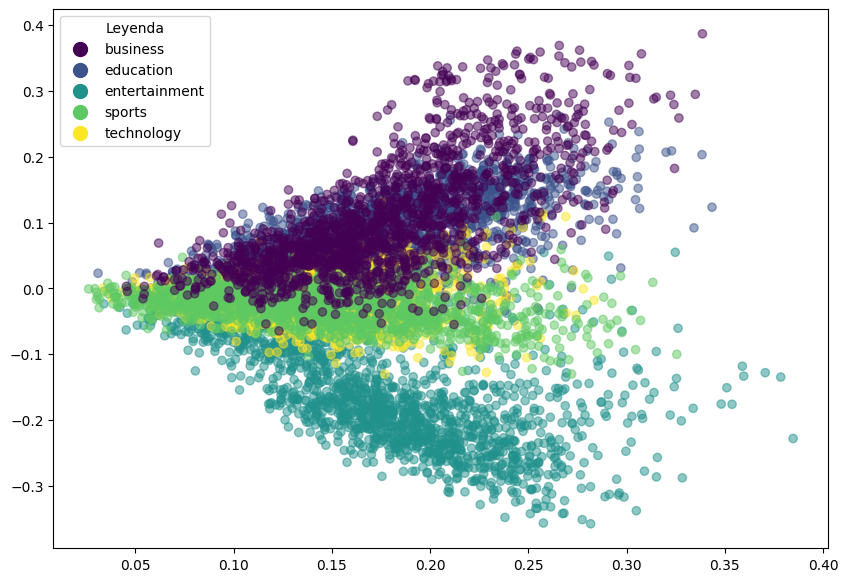

In [51]:
#Veamos gráficamente las componentes 1 y 2.
draw_components(unique_labels, tfidf_df, Y_train, 2)

¿Si revisamos con 10?

(8000, 10)


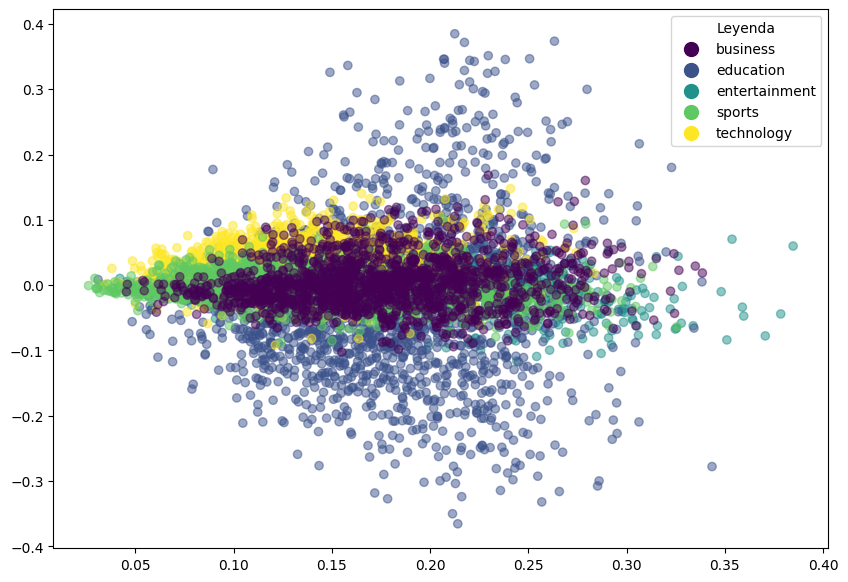

In [52]:
#Veamos gráficamente las componentes 1 y 10.
draw_components(unique_labels, tfidf_df, Y_train, 10)

---
# 3. Modelamiento.

## 3.1. Preparación de los datos

Definimos una clase para preparar los datos:

In [53]:
class TextPreprocessing():
    def __init__(self,stopwords=stopwords.words('english')):
        self.stopwords = stopwords
        self.max_words = 10000

    def remove_non_ascii(self, words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    def to_lowercase(self, words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    def remove_punctuation(self, words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def replace_numbers(self, words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def remove_stopwords(self, words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in self.stopwords:
                new_words.append(word)
        return new_words

    def stem_words(self, words):
        """Stem words in list of tokenized words"""
        stemmer = SnowballStemmer('spanish')
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    def lemmatize_verbs(self, words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas

    def stem_and_lemmatize(self, words):
        words = self.stem_words(words)
        words = self.lemmatize_verbs(words)
        return words

    def preproccesing(self, words):
        words = self.to_lowercase(words)
        words = self.replace_numbers(words)
        words = self.remove_punctuation(words)
        words = self.remove_non_ascii(words)
        words = self.remove_stopwords(words)
        return words

    def transform(self,X):
        X_train_new = pd.Series(X)
        X_train_new = X_train_new.apply(contractions.fix)
        X_train_new = X_train_new.apply(word_tokenize)
        X_train_new = X_train_new.apply(lambda x: self.preproccesing(x))
        #X_train_new = X_train_new.apply(lambda x: self.stem_and_lemmatize(x))
        X_train_new = X_train_new.apply(lambda x: self.stem_words(x))
        X_train_new = X_train_new.apply(lambda x: ' '.join(map(str, x)))
        tfidf_vect = TfidfVectorizer(max_features=self.max_words)
        X_tfidf = tfidf_vect.fit_transform(X_train_new)
        return X_tfidf

In [54]:
pipeline = TextPreprocessing()

In [55]:
X_train_p = pipeline.transform(X_train)
print(f"El tamaño es: {X_train_p.shape}")
X_train_p

El tamaño es: (8000, 10000)


<8000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 704255 stored elements in Compressed Sparse Row format>

In [56]:
X_test_p = pipeline.transform(X_test)
print(f"El tamaño es: {X_test_p.shape}")
X_test_p

El tamaño es: (2000, 10000)


<2000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 182737 stored elements in Compressed Sparse Row format>

## 3.2. Arquitectura de la red

La red que buscamos entrenar desde el punto de vista esquemático, sería de la siguiente forma:

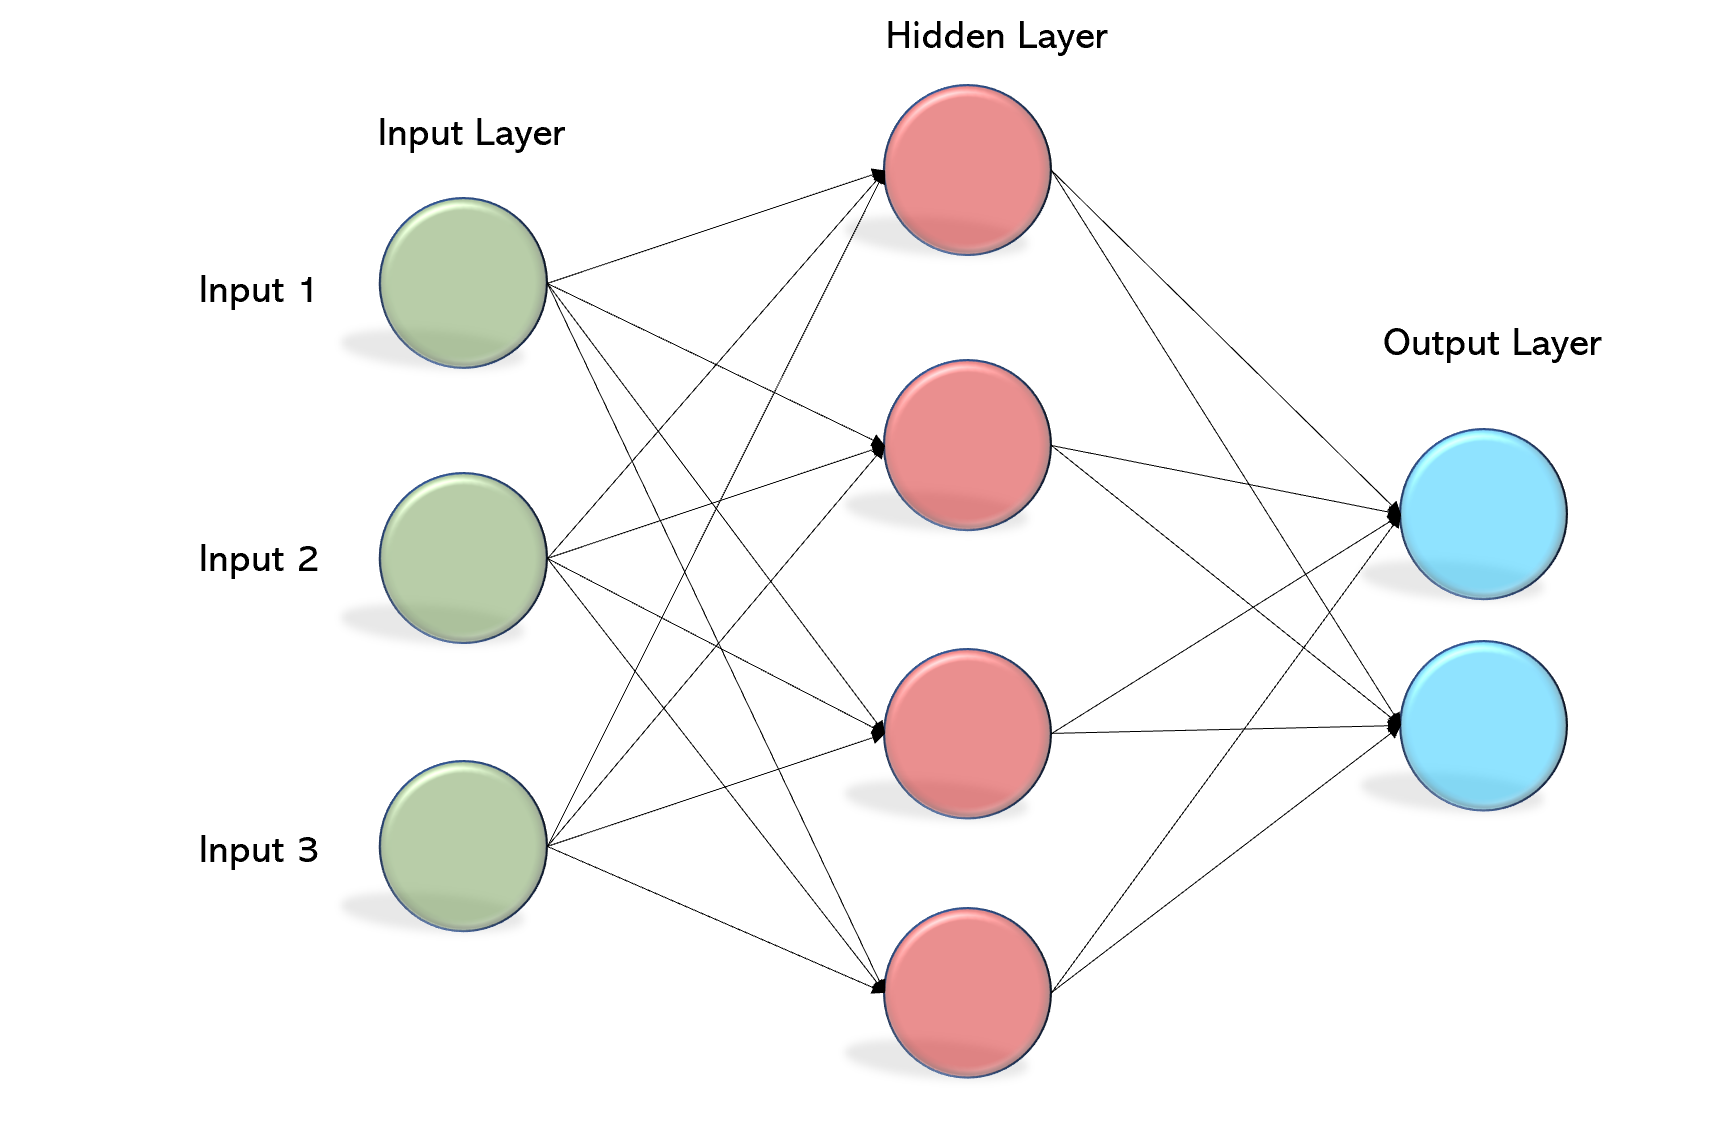

Definimos la arquitectura de la red neuronal MLP. Vamos a dar una vista a los tamaños de los datos de entrenamiento:

In [57]:
X_train_p.shape

(8000, 10000)

In [58]:
X_test_p.shape

(2000, 10000)

El número de clases:

In [59]:
len(unique_labels)

5

In [60]:
model = Sequential(name="My_first_NN")

La capa de entrada:

In [61]:
model.add(Dense(128, activation='relu', input_shape=(X_train_p.shape[1],), name="Input_Layer"))
model.summary()

Model: "My_first_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 128)               1280128   
                                                                 
Total params: 1280128 (4.88 MB)
Trainable params: 1280128 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Definimos una capa oculta

In [62]:
model.add(Dense(64, activation='relu', name="Hidden_Layer"))
model.summary()

Model: "My_first_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 128)               1280128   
                                                                 
 Hidden_Layer (Dense)        (None, 64)                8256      
                                                                 
Total params: 1288384 (4.91 MB)
Trainable params: 1288384 (4.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Capa de salida

In [63]:
model.add(Dense(len(unique_labels), activation="softmax", name='Output_Layer'))
model.summary()

Model: "My_first_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 128)               1280128   
                                                                 
 Hidden_Layer (Dense)        (None, 64)                8256      
                                                                 
 Output_Layer (Dense)        (None, 5)                 325       
                                                                 
Total params: 1288709 (4.92 MB)
Trainable params: 1288709 (4.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Ya con nuestra arquitectura construida, compilamos nuestro modelo definiendo que función de pérdida, optimizador y métrica vamos a utilizar para construir nuestro modelo.

In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "My_first_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 128)               1280128   
                                                                 
 Hidden_Layer (Dense)        (None, 64)                8256      
                                                                 
 Output_Layer (Dense)        (None, 5)                 325       
                                                                 
Total params: 1288709 (4.92 MB)
Trainable params: 1288709 (4.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Una manera más amigable de verlo...

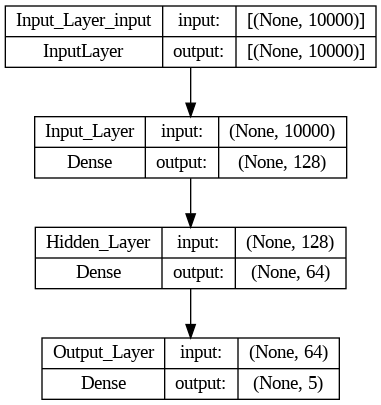

In [65]:
plot_model(model, show_shapes=True, show_layer_names=True)

##3.3. Entrenamiento

Entrenamos el modelo apoyándonos de GPU:

Definimos un early stopping para verificar el aprendizaje y no esperar a entrenar todas las épocas si el modelo empieza a ver constancia en el aprendizaje

In [66]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [67]:
with tf.device('/device:GPU:0'):
  history = model.fit(X_train_p.toarray(), Y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=2, callbacks=[early_stopping])

Epoch 1/100
200/200 - 4s - loss: 0.3320 - accuracy: 0.9534 - val_loss: 7.8576 - val_accuracy: 0.0000e+00 - 4s/epoch - 18ms/step
Epoch 2/100
200/200 - 1s - loss: 0.0083 - accuracy: 0.9987 - val_loss: 8.9630 - val_accuracy: 0.0000e+00 - 604ms/epoch - 3ms/step
Epoch 3/100
200/200 - 1s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 8.9423 - val_accuracy: 0.0000e+00 - 591ms/epoch - 3ms/step
Epoch 4/100
200/200 - 1s - loss: 6.9827e-04 - accuracy: 1.0000 - val_loss: 9.4569 - val_accuracy: 0.0000e+00 - 631ms/epoch - 3ms/step
Epoch 5/100
200/200 - 1s - loss: 4.3037e-04 - accuracy: 1.0000 - val_loss: 9.6836 - val_accuracy: 0.0000e+00 - 586ms/epoch - 3ms/step
Epoch 6/100
200/200 - 1s - loss: 2.7321e-04 - accuracy: 1.0000 - val_loss: 9.9598 - val_accuracy: 0.0000e+00 - 584ms/epoch - 3ms/step
Epoch 7/100
200/200 - 1s - loss: 1.9696e-04 - accuracy: 1.0000 - val_loss: 10.1428 - val_accuracy: 0.0000e+00 - 642ms/epoch - 3ms/step
Epoch 8/100
200/200 - 1s - loss: 1.4741e-04 - accuracy: 1.0000 - val_loss: 

Veamos en un gráfico el comportamiento de la pérdida en el entrenamiento:

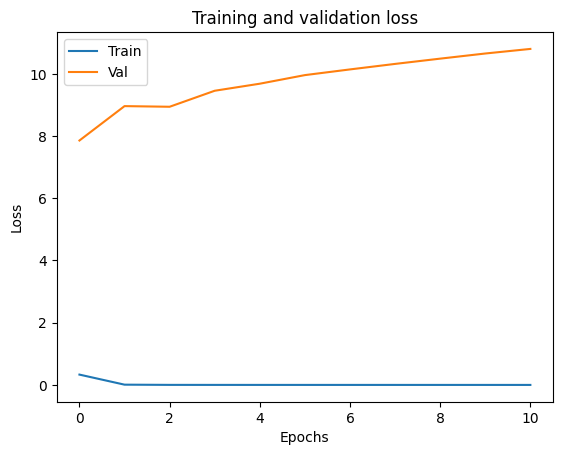

In [68]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Y la métrica?

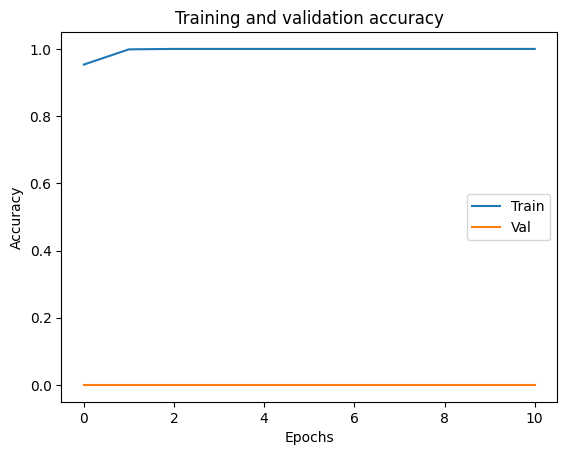

In [69]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##3.4. Validación

Verificamos la métrica con datos que no conoce la red:

In [70]:
model_accuracy = model.evaluate(X_test_p.toarray(), Y_test)
print("Model Accuracy:", model_accuracy)

63/63 [==============================] - 0s 4ms/step - loss: 2.3232 - accuracy: 0.2565
Model Accuracy: [2.323174476623535, 0.2565000057220459]


---
# 4. Preguntas

*   ¿Qué consideras que está afectando la baja precisión en el entrenamiento?
*   ¿Cómo sería el proceso incluyendo sin lematización?, ¿Cambian los valores?, ¿las métricas?
*   ¿Cuál sería el mejor número de componentes para el modelo?.
*   ¿Consideras necesaria una búsqueda de hiperparámetros?, ¿Con cuáles experimentarías?
*   ¿Si cambiamos el número de características en el Tf-idf puede mejorar o empeorar el modelo?

